In [1]:
import autograd.numpy as np
from autograd import grad
from autograd.numpy import log, sqrt, sin, cos, exp, pi, prod
from autograd.numpy.random import normal, uniform

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats
from tqdm import tqdm

In [3]:
from tools import Helper, Sampler
from domain import Flower, Polygon, Heart, Cross, Star
from data import CheckerBoard, Spiral, Moon, MixMultiVariateNormal

In [4]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

## My Domains

In [5]:
def plot_domain(myDomain):
    points = myDomain.position(np.arange(0, 1, 0.001))
    
    fig = plt.figure(figsize=(3, 3))
    plt.plot(points[0, :], points[1, :])
    plt.legend(loc="upper left", prop={'size': 10})
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


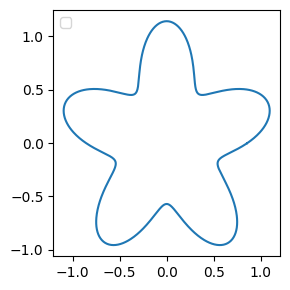

In [6]:
myFlower = Flower(petals=5, move_out=3)
plot_domain(myFlower)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


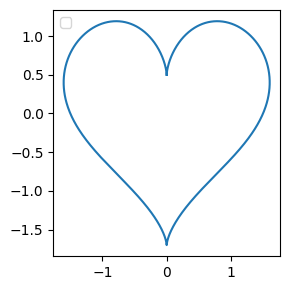

In [7]:
myHeart = Heart()
plot_domain(myHeart)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


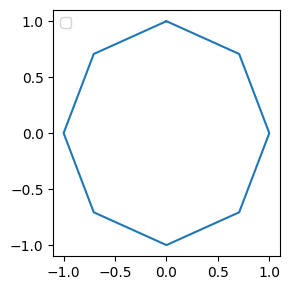

In [8]:
myPolygon = Polygon(corners=8)
plot_domain(myPolygon)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


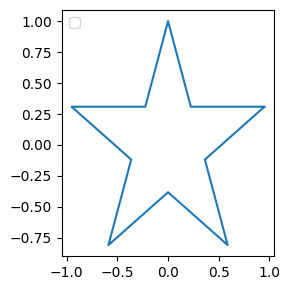

In [9]:
myStar = Star()
plot_domain(myStar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


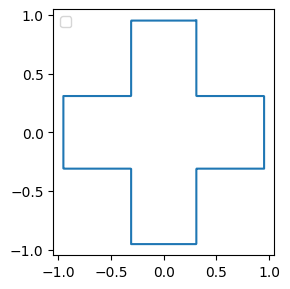

In [10]:
myCross = Cross()
plot_domain(myCross)

## My Unconstrained Data

In [11]:
def plot_data(myData):
    curPoints = myData.sample().t()

    fig = plt.figure(figsize=(3, 3))
    plt.plot(curPoints[0, :], curPoints[1, :], 'o', markersize=1)
    plt.legend(loc="upper left", prop={'size': 10})
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


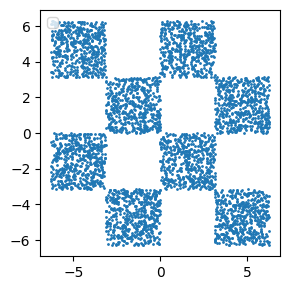

In [12]:
myData = CheckerBoard(4096)
plot_data(myData)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


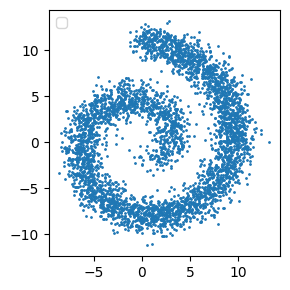

In [13]:
myData = Spiral(4096)
plot_data(myData)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


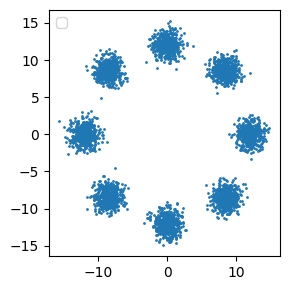

In [14]:
myData = MixMultiVariateNormal(4096) 
plot_data(myData)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


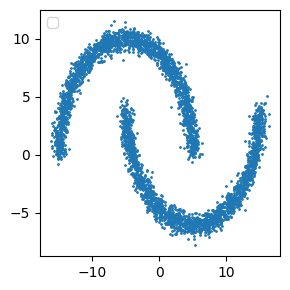

In [15]:
myData = Moon(4096)
plot_data(myData)

## Constrained Data

In [16]:
def constrained_data(dataClass=Spiral, domainClass=Heart, domain_radius=1):
    myHelper = Helper(domainClass, max_radius=domain_radius, grid_radius=1e-2, grid_curve=1e-3)
    myClass = domainClass(radius=domain_radius)
    myDomainCurve = myClass.position(np.arange(0, 1, 0.001))
    
    myData = dataClass(10000)
    points = myData.sample().numpy()

    constrained_data = np.empty((0, 2))
    for idx in range(points.shape[0]):
        inside_domain = myHelper.inside_domain(points[idx, :])
        if inside_domain:
            constrained_data = np.concatenate((constrained_data, points[idx, :].reshape(1, -1)), axis=0)

    fig = plt.figure(figsize=(3, 3))
    plt.plot(constrained_data[:, 0], constrained_data[:, 1], 'o', markersize=1)
    plt.plot(myDomainCurve[0, :], myDomainCurve[1, :], alpha=0.1)
    plt.legend(loc="upper left", prop={'size': 10})
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


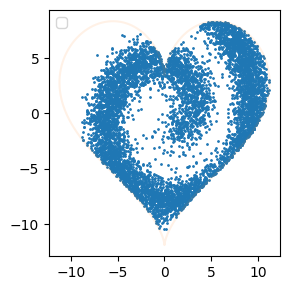

In [17]:
constrained_data(dataClass=Spiral, domainClass=Heart, domain_radius=7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


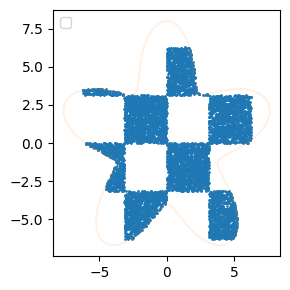

In [18]:
constrained_data(dataClass=CheckerBoard, domainClass=Flower, domain_radius=7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


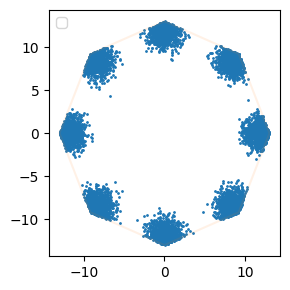

In [19]:
constrained_data(dataClass=MixMultiVariateNormal, domainClass=Polygon, domain_radius=13)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


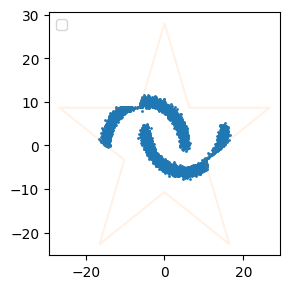

In [20]:
constrained_data(dataClass=Moon, domainClass=Star, domain_radius=28)